## Анализ маркетинговой аналитики онлайн-Афиши.   
-----------------
Цель проекта - снизить расходы, отказаться от невыгодных источников трафика и перераспределить бюджет.

#### Оглавление: 
<a class="anchor" id="step_0"></a>  

* [1. Загрузка файлов с данными и изучение общей информации.](#step_1)
* [2. Продуктовые метрики](#step_2) 
 * [2.1. Рассчет DAU, WAU и MAU](#step_2.1) 
 * [2.2. Сколько раз за день пользователи в среднем заходят на сайт](#step_2.2) 
 * [2.3. Сколько времени пользователи проводят на сайте](#step_2.3)
 * [2.4. Рассчет Retention Rate, применяя когортный анализ](#step_2.4) 
* [3. Метрики электронной коммерции](#step_3) 
 * [3.1. Сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки](#step_3.1)
 * [3.2. Рассчет среднего количество покупок на одного клиента за 6 месяцев, применяя когортный анализ](#step_3.2)
 * [3.3. Рассчет средней выручки с пользователя, как меняется эта метрика с течением времени](#step_3.3) 
 * [3.4. Как меняется во времени накопительный LTV по когортам](#step_3.4)
* [4. Маркетинговые метрики](#step_4)
 * [4.1. Рассчет общей суммы расходов на маркетинг. Как траты распределены по источникам и как меняется это распределение во времени](#step_4.1)
 * [4.2. Рассчет CAC. Сколько стоит привлечение одного покупателя из каждого источника трафика](#step_4.2)
 * [4.3. Рассчет ROMI по когортам в разрезе источников.  ](#step_4.3) 
* [5. Общий вывод](#step_5)

In [1]:
import pandas as pd # Импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # отключим предупреждения анаконды
from IPython.display import display
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
# sns.set() # Стилизуем графики
colours = ['#e8423c', '#66d173'] # Зададим цвета для двуцветных хитмапов
plt.rcParams['figure.figsize']=(16,5) # Зададим размер графиков по умолчанию
pd.set_option('max_columns', None) # Зададим вывод всех столбцов таблиц
pd.options.display.float_format = '{:.2f}'.format # Зададим удобный формат отображения вещественных чисел

In [2]:
# Функция если понадобится получить имя фрейма или серии
def get_name(obj):
    name =[x for x in globals() if globals()[x] is obj][0]
    return name

In [3]:
# Загрузим датасеты
try:
    visits = pd.read_csv('visits_log.csv')
    orders = pd.read_csv('orders_log.csv')
    costs = pd.read_csv('costs.csv')    
except:
    visits = pd.read_csv('/Users/victorchudnovskiy/Documents/raw_csv/visits_log.csv')
    orders = pd.read_csv('/Users/victorchudnovskiy/Documents/raw_csv/orders_log.csv')
    costs = pd.read_csv('/Users/victorchudnovskiy/Documents/raw_csv/costs.csv')

## 1. Загрузка данные и подготовка их к анализу  
[к оглавлению](#step_0)
<a class="anchor" id="step_1"></a>

In [4]:
# Создадим список датасетов для групповой обработки
df_list = [visits, orders, costs]

In [5]:
# Применив функцию, определяющую имена переменных в проекте в циклк выведем информацию о датафреймах
for df in df_list:
    print(f'Датафрейм {get_name(df)}')
    display(df.head(3))
    display(df.info())
    print('_'*70)

Датафрейм visits


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None

______________________________________________________________________
Датафрейм orders


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None

______________________________________________________________________
Датафрейм costs


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None

______________________________________________________________________


В исследуемых таблицах очевидно пропусков нет, но заголовки столбцов представленны в неудобном стиле, а данные с датами в строковом формате. Исправим это недоразумение, приведя залоговки к удобному стилю `snake_case`, а даты к типу `datetime`

In [6]:
for df in df_list:
    df.columns = [i.lower().replace(' ', '_') for i in df.columns.to_list()]
    for col in df.columns:
        if '_ts' in col or 'dt' in col:
            df[col] = pd.to_datetime(df[col])

Обновим информацию о датафреймах и убедимся в результатах преобразований.

In [7]:
# Применив функцию, определяющую имена переменных в проекте в циклк выведем информацию о датафреймах
for df in df_list:
    print(f'Датафрейм {get_name(df)}')
    display(df.head(3))
    display(df.info())
    print('_'*70)

Датафрейм visits


,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


None

______________________________________________________________________
Датафрейм orders


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


None

______________________________________________________________________
Датафрейм costs


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


None

______________________________________________________________________


На всякий случай проверим таблицы на наличие дубликатов.

In [8]:
for df in df_list:
    print(f'В датафрейме {get_name(df)} выявлено {df.duplicated().sum()} дубликатов')

В датафрейме visits выявлено 0 дубликатов
В датафрейме orders выявлено 0 дубликатов
В датафрейме costs выявлено 0 дубликатов


#### Вывод 
Таблицы загружены, названия столбцов изменены, типы данных приведены в соответствие содержимому. Пропусков и дубликатов нет. Приступим к нализу.

## 2. Продуктовые метрики  
[к оглавлению](#step_0)
<a class="anchor" id="step_2"></a>

Прежде чем анализировать продуктовые метрики проверим чтобы время начала сессии не было позже времени окончания, так как это противоречит логике.

In [9]:
visits['bad_time'] = visits['start_ts'] > visits['end_ts']
visits.query('bad_time == True')['start_ts'].describe()

count                       2
unique                      2
top       2018-03-25 03:55:00
freq                        1
first     2018-03-25 03:50:00
last      2018-03-25 03:55:00
Name: start_ts, dtype: object

Очевидно, таких сутуаций две. Удалим эти строки из таблицы с визитами

In [10]:
visits = visits.query('bad_time == False').copy()

Добавим в таблизу с визитами столбцы информирующие о годе, месяце, неделе, и дате сессии пользователя

In [11]:
visits['session_year'] = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week'] = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date
visits.head() 

,device,end_ts,source_id,start_ts,uid,bad_time,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,False,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,False,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,False,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,False,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,False,2017,12,52,2017-12-27


Определим дату и время первого посещения сервиса пользователем, и добавим в ее к каждому пользователю

In [12]:
first_session_date = visits.groupby('uid')['start_ts'].min()
first_session_date.name = 'first_ts'
visits = visits.join(first_session_date, on='uid')
visits.head(3)

,device,end_ts,source_id,start_ts,uid,bad_time,session_year,session_month,session_week,session_date,first_ts
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,False,2017,12,51,2017-12-20,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,False,2018,2,8,2018-02-19,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,False,2017,7,26,2017-07-01,2017-07-01 01:54:00


Преобразуем новый столбец с датой и временем в формат `datetime` и выделим месяц первого посещения

In [13]:
visits['first_visit_month'] = visits['first_ts'].astype('datetime64[M]')
visits['visit_month'] = visits['start_ts'].astype('datetime64[M]')
visits.head(3)

,device,end_ts,source_id,start_ts,uid,bad_time,session_year,session_month,session_week,session_date,first_ts,first_visit_month,visit_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,False,2017,12,51,2017-12-20,2017-12-20 17:20:00,2017-12-01,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,False,2018,2,8,2018-02-19,2018-02-19 16:53:00,2018-02-01,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,False,2017,7,26,2017-07-01,2017-07-01 01:54:00,2017-07-01,2017-07-01


Определим время жизни будущей когорты пользователей.

In [14]:
visits['cohort_lifetime'] = (
    (visits['visit_month'] - visits['first_visit_month']) / np.timedelta64(1, 'M')
).round().astype('int')
visits.head(3)

,device,end_ts,source_id,start_ts,uid,bad_time,session_year,session_month,session_week,session_date,first_ts,first_visit_month,visit_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,False,2017,12,51,2017-12-20,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,False,2018,2,8,2018-02-19,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,False,2017,7,26,2017-07-01,2017-07-01 01:54:00,2017-07-01,2017-07-01,0


Проеобразовав таблицу с посещениями сервиса пользователями расчсчитаем необходимые метрики.

### 2.1. Рассчет DAU, WAU и MAU за весь период, а также графики изменения метрик во времени  
[к оглавлению](#step_0)
<a class="anchor" id="step_2.1"></a>

РАссчитаем метрики пользовательской активности  
* DAU (от англ. daily active users) — количество уникальных пользователей в день;
* WAU (от англ. weekly active users) — количество уникальных пользователей в неделю;
* MAU (от англ. monthly active users) — количество уникальных пользователей в месяц.  

Сгруппируем ранее полученные даты, недели, месяцы и годы сессий по уникальным пользователям и получим вспомогательные датасеты, где будут два столбца. В случае с недельным и месячным показателем добавим год, чтобы соблюсти уникальность в течении года:  
* Соответствующий период посещения и 
* Число уникальных посетитетей  

Необходитые метрики это будут средние значения числа пользователей


In [15]:
dau = visits.groupby('session_date').agg({'uid': 'nunique'})
dau_total = dau.mean()
wau = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'})
wau_total = wau.mean()
mau = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'})
mau_total = mau.mean()
print(f'DAU {int(dau_total)}')
print(f'WAU {int(wau_total)}')
print(f'MAU {int(mau_total)}')

DAU 907
WAU 5716
MAU 23228


Дополнительно рассчитаем Sticky Factor - показатель лояльности аудитории к сервису. Показывает частоту и регулярность использования приложения в течение недели или месяца. Этот показатель часто переводят как «Липкость», «Показатель липучести», однако более корректным следует считать интерпретацию словосочетания Sticky Factor как «Степень вовлечения».

In [16]:
print(f'Sticky Factor (недельный) DAU / WAU = {float((dau_total)/(wau_total)):.2%}')
print(f'Sticky Factor (месячный) DAU / MAU = {float((dau_total)/(mau_total)):.2%}')

Sticky Factor (недельный) DAU / WAU = 15.88%
Sticky Factor (месячный) DAU / MAU = 3.91%


Анализ показал что в течении месяца сервисом интересуется в среднем 23228 пользователей. Причем в течении недели почти 16% к нему возвращается. но с течением месяца интерес охладевает. Есть смысл после 2 недели делать ненавязчивую рассылку с анонсами, чтобы поднять этот показатель.

Отобразим метрики  **DAU WAU MAU** на графиках.

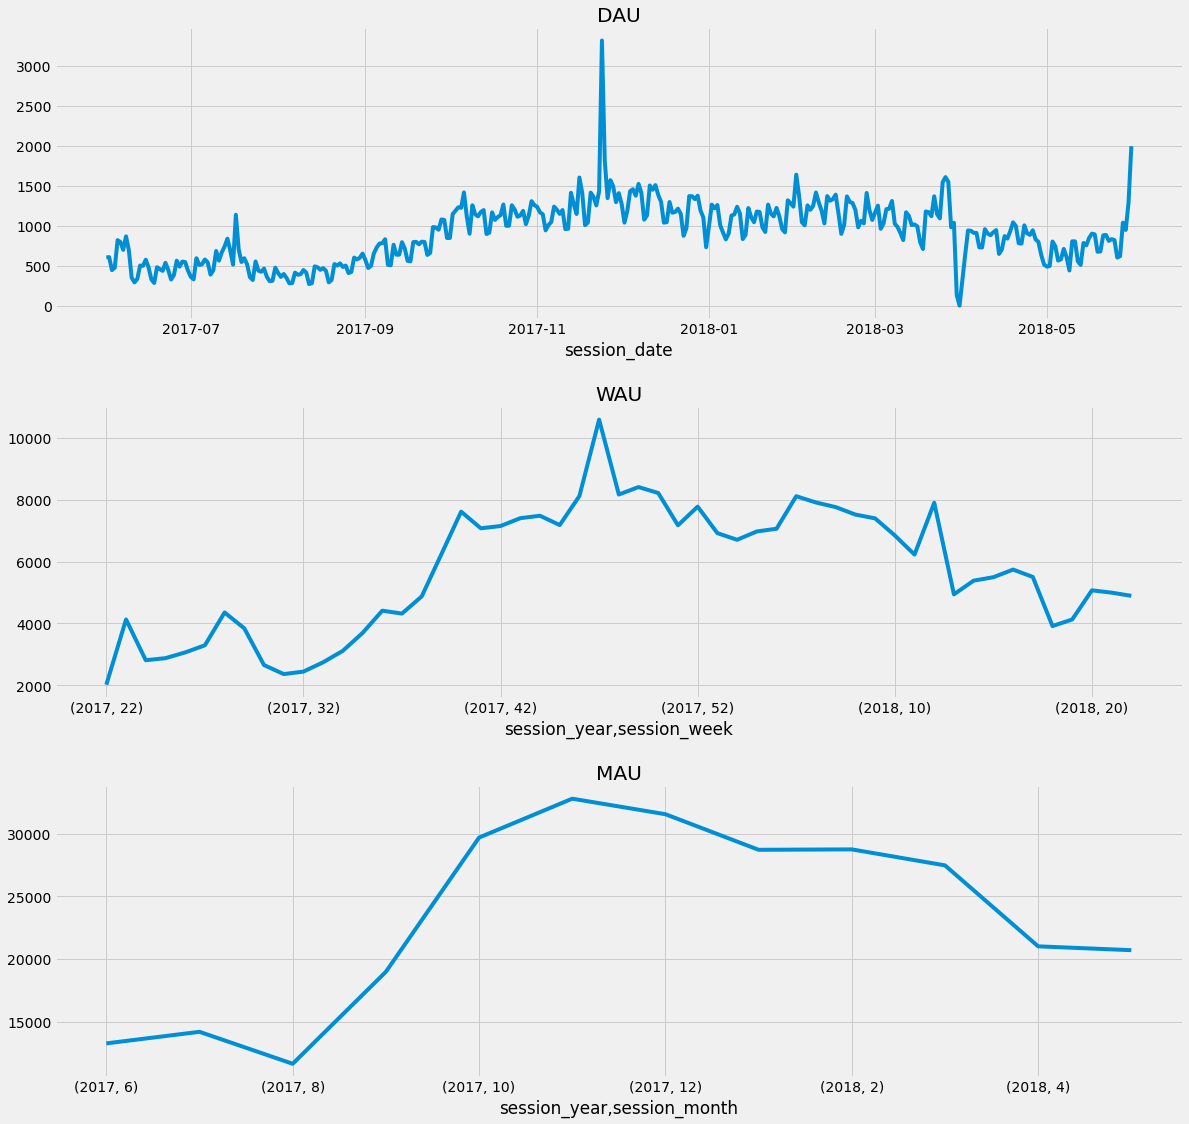

In [17]:
fig, axs = plt.subplots(3, 1, figsize=(18, 18))
dau.plot(ax = axs[0], title='DAU', legend='')
wau.plot(ax = axs[1], title='WAU', legend='')
mau.plot(ax = axs[2], title='MAU', legend='')
plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()

Невооруженным глазом видно что посещаемость сервиса возрастает с осени до мая с пиком в декабре. Однозначно это связано с сезоном отпусков и пользователь - местный житель, которого в своем городе становится меньше. С другой стороны есть и приезжающие туристы. Есть смысл как-то принформировать приезжающих о проводимых в данном городе мероприятих летом. Причем, когда закончится карантин в добавок на китайском.  
Так же всплеск проявляется в ноябре-декабре в предверии новогодних праздников. Люди планируют досуг новогодних каникул.

Для наглядности добавим к предыдущим графикам разбиением посетителей на когорты.

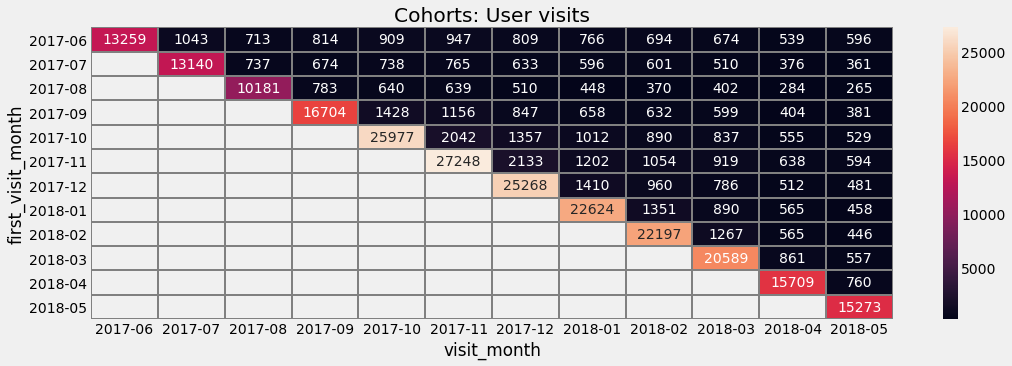

In [18]:
visits_pivot = visits.pivot_table(index='first_visit_month', columns='visit_month', values='uid', aggfunc='nunique')
# Чтобы в тепловой карте заголовки месяцев не выводились в полном формате дата-время, ограничим формат год-месяц
# Это относится и к индексам и столбцам
visits_pivot.index = visits_pivot.index.strftime('%Y-%m')
visits_pivot.columns = visits_pivot.columns.strftime('%Y-%m')
sns.heatmap(visits_pivot, annot=True, fmt='.0f', linewidths=1, linecolor='gray').set(title='Cohorts: User visits')
plt.show()

**Вывод**  
Когортный анализ подтвеждает выводы. Зимой надо как-то развлекаться. На даче холодно, море замерзло, Новый год. Свежих пользователей больше. Но падение интереса на последующие месяцы у всех когорт одинаково, иначе у зимних когорт удержание в сервисе было бы заметней. Может быть нагон клиентов связан скорее с маркетинговыми акциями сервиса? об этом мы узнаем дальше.

### 2.2. Сколько раз за день пользователи в среднем заходят на сайт  
[к оглавлению](#step_0)
<a class="anchor" id="step_2.2"></a>

In [19]:
sessions_by_device = visits.groupby(['session_date','device']).agg({'uid': ['count','nunique']}).reset_index()
sessions_by_device['sessions_per_user'] = sessions_by_device['uid']['count'] / sessions_by_device['uid']['nunique']
sessions_by_device.head()

session_date   device   uid         sessions_per_user
                        count nunique                  
0   2017-06-01  desktop   501     455              1.10
1   2017-06-01    touch   163     153              1.07
2   2017-06-02  desktop   498     458              1.09
3   2017-06-02    touch   160     152              1.05
4   2017-06-03  desktop   329     307              1.07

In [20]:
sessions_total = visits.groupby(['session_date']).agg({'uid': ['count','nunique']}).reset_index()
sessions_total['sessions_per_user'] = sessions_total['uid']['count'] / sessions_total['uid']['nunique']
sessions_total.head()

session_date   uid         sessions_per_user
               count nunique                  
0   2017-06-01   664     605              1.10
1   2017-06-02   658     608              1.08
2   2017-06-03   477     445              1.07
3   2017-06-04   510     476              1.07
4   2017-06-05   893     820              1.09

In [21]:
mean_duration = sessions_total['sessions_per_user'].mean()
print(f'Пользователи в среднем заходят в сервис {mean_duration:.2f} раз в день')

Пользователи в среднем заходят в сервис 1.08 раз в день


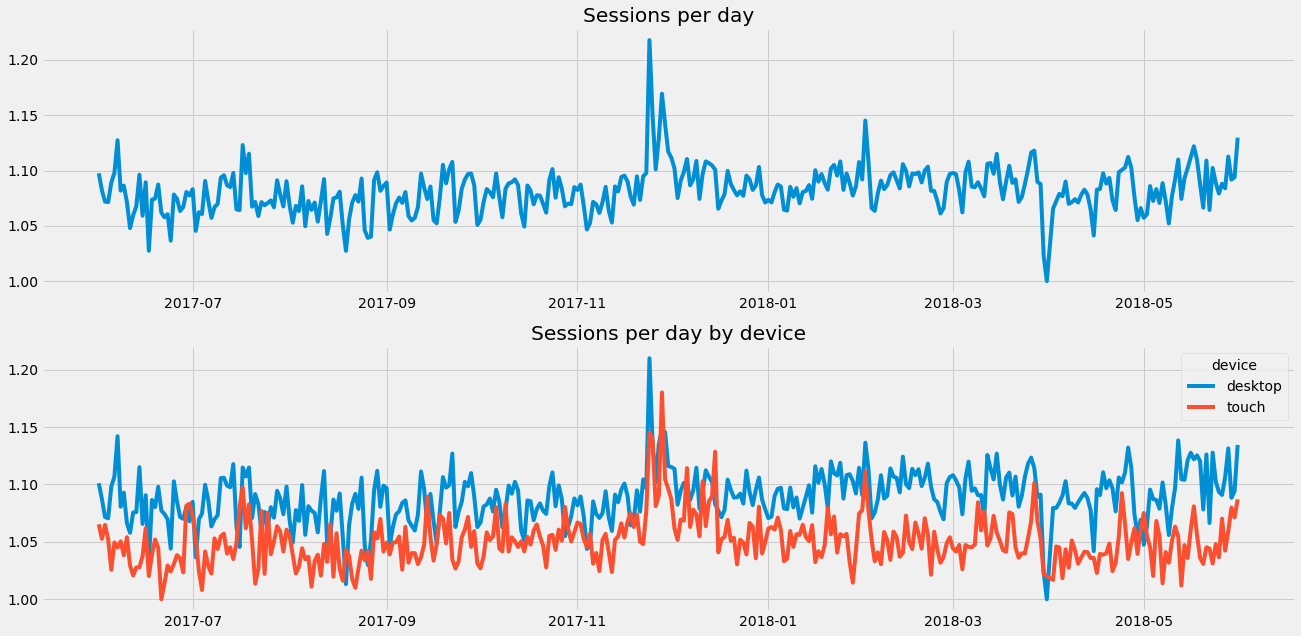

In [22]:
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
sns.lineplot(y = 'sessions_per_user', 
            x='session_date', 
            data=sessions_total, 
            ax =axs[0]).set(title='Sessions per day', 
                            ylabel='', 
                            xlabel='')
sns.lineplot(y = 'sessions_per_user', 
            x='session_date', 
            hue='device', 
            data=sessions_by_device, 
            ax =axs[1]).set(title='Sessions per day by device', 
                            ylabel='', 
                            xlabel='')
plt.show()

**Вывод**  
Графики количества ежедневных сессий демонстрирует расчет среднего количества как 1.08 раз в день. Более того количество сессий с десктопа и телефонов пропорционально. Входов с телефона, естественно меньше. В декабре количество сессий возрастает, но не надолго. Праздники...

### 2.3. Сколько времени пользователи проводят на сайте.  
[к оглавлению](#step_0)
<a class="anchor" id="step_2.3"></a>

Для ответа на вопрос о длительности нахождения пользователя в сервисе определим разницу между временем конца и начала сессии в секундах. Среднее и медиана не подойдут, т.к. очень большой разброс и эти оцека больше подходят к распределению похожему на нормальное. Наше же распределение - скорее геометрическое. Мода - (наиболее часто встречающееся значение) будет в самый раз.

In [23]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

In [24]:
visits['session_duration_sec'].describe()

count   359398.00
mean       643.04
std        997.11
min          0.00
25%        120.00
50%        300.00
75%        840.00
max      42660.00
Name: session_duration_sec, dtype: float64

In [25]:
mode_duration = visits['session_duration_sec'].mode()
print(f'Пользователь проводит в сервисе чаще всего {int(mode_duration)} секунд')

Пользователь проводит в сервисе чаще всего 60 секунд


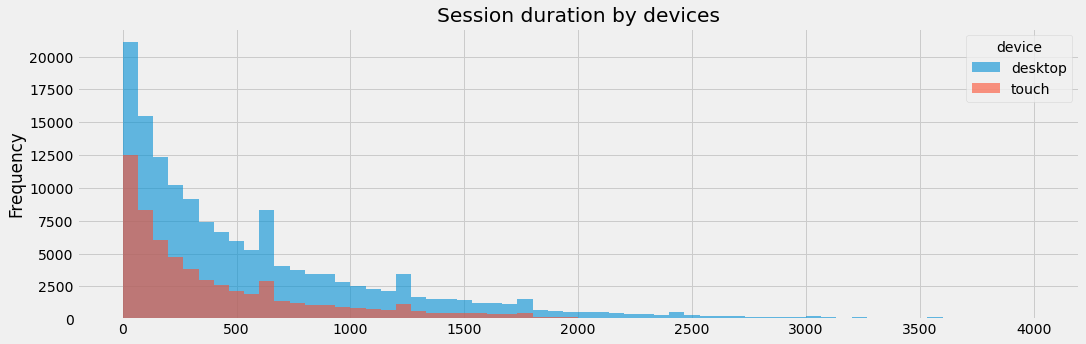

In [26]:
visits_by_dev = visits.query('session_duration_sec > 0').pivot_table(index='uid', columns='device', values='session_duration_sec')
visits_by_dev.plot(kind='hist', bins=60, range=(0,4000), alpha=.6)
plt.title('Session duration by devices')
plt.show()

**Вывод**  
На графике видно что распределение распредеено гемометрически, чаще всего пользователи не задерживаются в сервисе дольше чем на 60 секунд, Примечательно что длительность с дектопа и телофона прямо пропроционально. С телефона, естественно короче. Данный график подтверждает предыдущий о количестве входов в сервис. Чтобы понять стоит ли зазвивать мобильную платформу, благоразумно провести тесты на группах. Может это психологическая особенность человека, подходить к досугу основательно усевшись перед монитором.

### 2.4. Рассчет `Retention Rate`, применяя когортный анализ  
[к оглавлению](#step_0)
<a class="anchor" id="step_2.4"></a>

Попробуем понять как наш сервис удерживает клиентов. Для этого определим сколько пользователей пришедших в нулевой месяц продолжают пользоваться сервисом дальше.

In [27]:
# Все посещения пользователей своих когорт разбитые на периоды жизни когорты
cohorts_by_visits = visits.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
cohorts_by_visits.head()

,first_visit_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


In [28]:
# Выделяем количество изначальных пользователей т.е. в нулевой период
initial_users_count = cohorts_by_visits.query('cohort_lifetime == 0')[['first_visit_month','uid']]
# Переименуем uid на звучное название - численность когорты
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

In [29]:
# Снабдим предыдущую таблицу нулевым количеством пользователей каждой каогорты
cohorts_by_visits = cohorts_by_visits.merge(initial_users_count,on='first_visit_month')
cohorts_by_visits['first_visit_month'] = cohorts_by_visits['first_visit_month'].dt.strftime('%Y-%m')
cohorts_by_visits.head()

,first_visit_month,cohort_lifetime,uid,cohort_users
0,2017-06,0,13259,13259
1,2017-06,1,1043,13259
2,2017-06,2,713,13259
3,2017-06,3,814,13259
4,2017-06,4,909,13259


In [30]:
# Добавим Ретеншн как отношение пользователей пришедших в какой-то определенный период жизни когорты к нулевому количеству
cohorts_by_visits['retention'] = cohorts_by_visits['uid']/cohorts_by_visits['cohort_users']
# В задании этого не требуется, но добавим коэффициент оттока, цена вопроса одна строка кода
# Раасчитаем коэффициент как отношение количества текущего периода жизни к предыдущему в рамках конкретной когорты
cohorts_by_visits['churn_rate'] = cohorts_by_visits.groupby(['first_visit_month'])['uid'].pct_change().fillna(0)
cohorts_by_visits.head()

,first_visit_month,cohort_lifetime,uid,cohort_users,retention,churn_rate
0,2017-06,0,13259,13259,1.00,0.00
1,2017-06,1,1043,13259,0.08,-0.92
2,2017-06,2,713,13259,0.05,-0.32
3,2017-06,3,814,13259,0.06,0.14
4,2017-06,4,909,13259,0.07,0.12


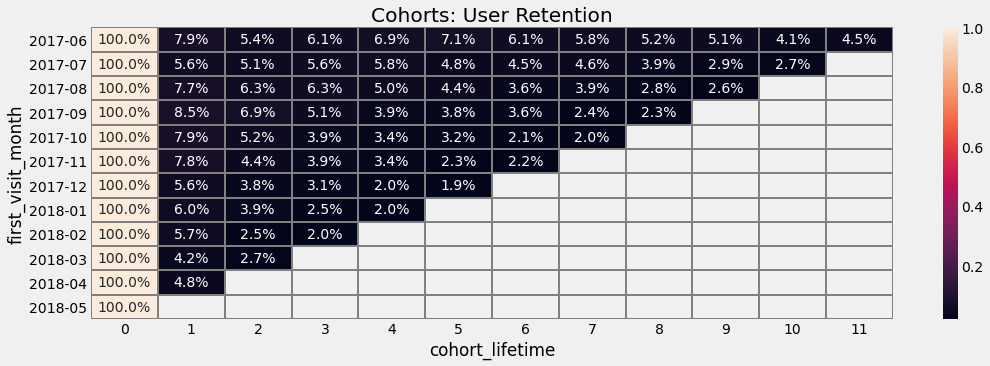

In [31]:
# Сгруппируем полученную таблицу по месяцу когорты, сроку жизни когорты и проценту удержания
retention_pivot_visits = cohorts_by_visits.pivot_table(index='first_visit_month',columns='cohort_lifetime',values='retention',aggfunc='mean')
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot_visits, annot=True, fmt='.1%', linewidths=1, linecolor='gray')
plt.show()

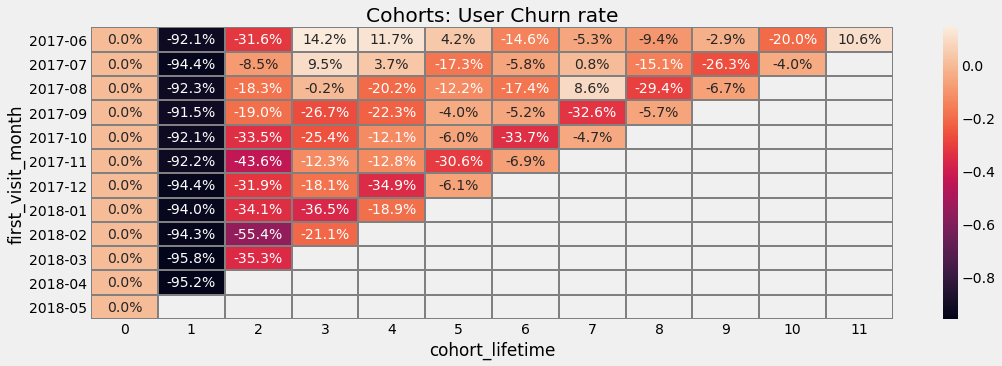

In [32]:
churn_pivot_visits = cohorts_by_visits.pivot_table(index='first_visit_month',columns='cohort_lifetime',values='churn_rate',aggfunc='mean')
plt.title('Cohorts: User Churn rate')
sns.heatmap(churn_pivot_visits, annot=True, fmt='.1%', linewidths=1, linecolor='gray')
plt.show()

**Вывод**  
Как видно на графиках удержание пользователей не на высоком уровне, а коэффициент оттока на второй месяц не ниже 92%, а дальше еще порядка 30% от оставшихся. Хорошо это или плохо, мне оценить сложно. Может быть это специфика бизнеса онлай анфиш, может быть скучность города, может быть чрезмерная занятость населения, или насыщенность досуга не предполагающия поиска новых развлечений... Далее сравним коэффициент удержания и маркетинговые расходы.

## 3. Метрики электронной коммерции  
[к оглавлению](#step_0)
<a class="anchor" id="step_3"></a>

### 3.1. Сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки  
[к оглавлению](#step_0)
<a class="anchor" id="step_3.1"></a>

Добавим в информацию о заказах время первого посещения пользователем сервиса из таблицы с визитами. После этого определим временной промежуток между первым посещением и временем оплаты заказа в секундах.

In [33]:
orders = orders.join(first_session_date, on='uid')
orders.head()

,buy_ts,revenue,uid,first_ts
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00


In [34]:
orders['purchase_duration_sec'] = (orders['buy_ts'] - orders['first_ts']).dt.seconds
orders['purchase_duration_sec'].describe()

count   50415.00
mean    21482.56
std     29056.97
min         0.00
25%       360.00
50%      3840.00
75%     39000.00
max     86340.00
Name: purchase_duration_sec, dtype: float64

In [35]:
mode_pur_duration = orders.query('purchase_duration_sec !=0')['purchase_duration_sec'].mode()
print(f'Пользователь чаще всего совершает покупку за {int(mode_pur_duration)} секунд')

Пользователь чаще всего совершает покупку за 60 секунд


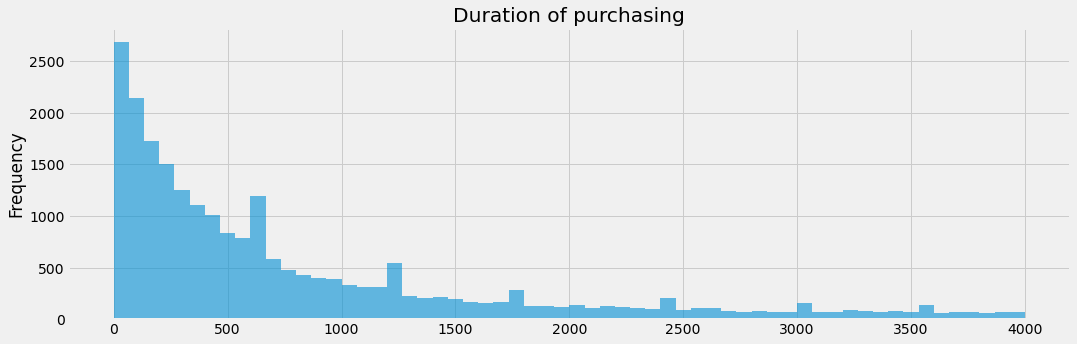

In [36]:
orders.query('purchase_duration_sec !=0')['purchase_duration_sec'].plot(kind='hist', bins=60, range=(0,4000), alpha=.6)
plt.title('Duration of purchasing')
plt.show()

**Вывод**  
Распределение длительности времени покупки похоже на распределение дительности сессии и так же чаще всего занимает 60 секунд. Складывается впечатление что типичный пользователь афиши заходит в сервис по ссылкам на конкретные мероприятия и не особо интересуется остальными предложениями. Это подверждается сильным падением **Retention rate** на следующий месяц после нулевого.

### 3.2. Рассчет среднего количества покупок на одного клиента за 6 месяцев, применяя когортный анализ
[к оглавлению](#step_0)
<a class="anchor" id="step_3.2"></a>

Добавим в таблицу с заказами информацию из какого источника пользователь впервые посетил сервис. Иными словами благодаря каким рекламным усилиям пользователь совершает покупки. После чего преобразуем таблицу для когортного анализа.

In [37]:
# Выделим из даты заказа месяц
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders.head(3)

,buy_ts,revenue,uid,first_ts,purchase_duration_sec,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,60,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,660,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,120,2017-06-01


In [38]:
# Определим месяц первого заказа каждого пользователя
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head(3)

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01


In [39]:
# Сгруппируем месяц первого заказа по количеству уникальных пользователей
cohort_sizes = first_orders.groupby(['first_order_month']).agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head(3)

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370


In [40]:
# Добавим в таблицу с заказами информацию в каком месяце пользователь сделал свой первый заказ
orders_new = pd.merge(orders,first_orders, on='uid')
orders_new.head(3)

,buy_ts,revenue,uid,first_ts,purchase_duration_sec,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,60,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,660,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,120,2017-06-01,2017-06-01


In [41]:
# Сгруппируем таблицу заказов по месяцу первой покупки, месяцу каждого заказа и сложим выручку.
# Для подсчета количества заказов применим buy_ts, а потом переименуем
cohorts = orders_new.groupby(
    ['first_order_month','order_month']
).agg({'revenue':'sum', 'uid':'nunique', 'buy_ts': 'count'}).reset_index()
cohorts.head(3)

,first_order_month,order_month,revenue,uid,buy_ts
0,2017-06-01,2017-06-01,9557.49,2023,2354
1,2017-06-01,2017-07-01,981.82,61,177
2,2017-06-01,2017-08-01,885.34,50,174


In [42]:
# Получим предготовую таблицу для когортного анализа
# Объеденим таблицу с когортами и соответствующие им выручки и количество заказов
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report = report.rename(columns = {'buy_ts':'revenue_count'})
report.head()

,first_order_month,n_buyers,order_month,revenue,uid,revenue_count
0,2017-06-01,2023,2017-06-01,9557.49,2023,2354
1,2017-06-01,2023,2017-07-01,981.82,61,177
2,2017-06-01,2023,2017-08-01,885.34,50,174
3,2017-06-01,2023,2017-09-01,1931.30,54,226
4,2017-06-01,2023,2017-10-01,2068.58,88,292


Проверим не ушли ли мы с тропы расчетов после обилия джойнов и мёрджей. Выручка в таблице с заказами должна равняться выручке в таблице репорт

In [43]:
orders['revenue'].sum()

252057.19999999998

In [44]:
report['revenue'].sum()

252057.19999999934

<a class="anchor" id="step_8"></a>

In [45]:
# Рассчитаем необходимые метрики без учета источников
margin_rate = 1
# Валовая прибыль = выручка * маржинальность (мне как экономисту это известно как маржинальный доход)
report['gp'] = report['revenue'] * margin_rate
# Возраст кагорты = разница между месяцем заказа и первым месяцем заказа кагорты в целых месяцах
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
# LTV = Валовая прибыль когорты / количество пользователей в нулевом месяце этой когорты этого источника
report['ltv'] = report['gp'] / report['n_buyers']
# APC (average payment count) — среднее количетсво покупок = количество покупок / количество клиентов текущего месяца
report['apc'] = report['revenue_count'] / report['n_buyers']
# ARPPU (average revenue per paying user) - средний чек = выручка / количество клиентов текущего месяца
report['arppu'] = report['revenue'] / report['uid']
report.head(3)

,first_order_month,n_buyers,order_month,revenue,uid,revenue_count,gp,age,ltv,apc,arppu
0,2017-06-01,2023,2017-06-01,9557.49,2023,2354,9557.49,0,4.72,1.16,4.72
1,2017-06-01,2023,2017-07-01,981.82,61,177,981.82,1,0.49,0.09,16.10
2,2017-06-01,2023,2017-08-01,885.34,50,174,885.34,2,0.44,0.09,17.71


Подсчитаем среднее количество покупок на 1 клиента в сводной таблице где строки это когорты, столбцы это сроки жизни когорт, значения - накопительные средние количество покупок по когортам. Т/к мы применили накопление значений по столбцам, то в 6 столбце будет накопленное среднее значение покупок с 1 по 6 lifetime, следовательно среднее по срезу этого столбца и будет искомым значением.

In [46]:
apc_table = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='apc', 
        aggfunc='mean').cumsum(axis=1)
apc_table.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.16,1.25,1.34,1.45,1.59,1.70,1.84,1.92,2.03,2.10,2.15,2.19
2017-07-01,1.14,1.19,1.25,1.31,1.34,1.39,1.42,1.44,1.47,1.49,1.51,
2017-08-01,1.12,1.20,1.27,1.33,1.39,1.44,1.47,1.53,1.56,1.60,,
2017-09-01,1.14,1.22,1.28,1.35,1.37,1.42,1.46,1.48,1.50,,,
2017-10-01,1.14,1.22,1.25,1.28,1.31,1.34,1.35,1.38,,,,
2017-11-01,1.18,1.28,1.32,1.37,1.41,1.42,1.45,,,,,
2017-12-01,1.15,1.21,1.26,1.30,1.32,1.34,,,,,,
2018-01-01,1.12,1.19,1.24,1.25,1.28,,,,,,,
2018-02-01,1.12,1.18,1.21,1.22,,,,,,,,


In [47]:
print('Cреднее количество покупок на одного клиента за 6 месяцев - {:.2f}'.format(apc_table[5].mean()))

Cреднее количество покупок на одного клиента за 6 месяцев - 1.43


### 3.3. Рассчет средней выручки с пользователя, как меняется эта метрика с течением времени  
[к оглавлению](#step_0)
<a class="anchor" id="step_3.3"></a>

Средняя выручка, или средний чек, или Average Revenue Per Paying User (ARPPU) — выручка на одного платящего пользователя рассчитывается как Выручка / количество покупателей. Эта метрика была рассчитана в пункте [3.2](#step_8). Нам остается лишь вывести ее в сводной таблице и посмотреть в каких когортах и как она изменятеся по месяцам.

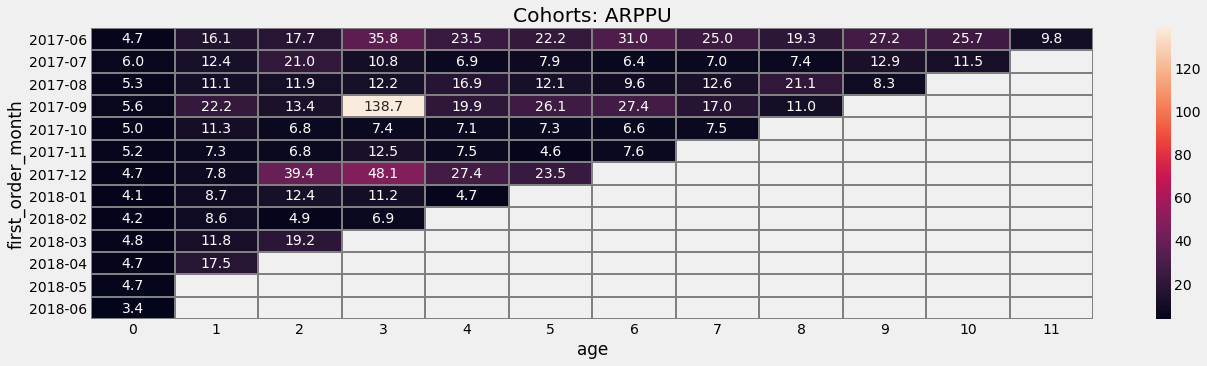

In [48]:
arppu_table = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='arppu', 
        aggfunc='mean')
arppu_table.index = arppu_table.index.strftime('%Y-%m')
#arppu_table.columns = arppu_table.columns.strftime('%Y-%m')
plt.figure(figsize=(20, 5))
plt.title('Cohorts: ARPPU')
sns.heatmap(arppu_table, annot=True, fmt='.1f', linewidths=1, linecolor='gray')
plt.show()

**Вывод**  
Очевидно что в первый месяц клиенты покупают осторожно, но те кто остался, согласно **Retation** это 7% от первоначального количества начинают покупать поактивней. Интересный скачок наблюдается в когорте 2017-09 на 4 месяц т.е. в декабре 2017. Посмотрим повнимательней на данные

In [49]:
cohort_2017_09 = report.query('first_order_month == "2017-09-01" & order_month == "2017-12-01"').sort_values(by='revenue', ascending=False)
a = cohort_2017_09['revenue'].sum()
b = cohort_2017_09['uid'].sum()
c = a / b
print(f' выручка {round(a)}')
print(f' пользователи {b}')
print(f' средний чек {round(c)}')
cohort_2017_09

 выручка 10262
 пользователи 74
 средний чек 139


,first_order_month,n_buyers,order_month,revenue,uid,revenue_count,gp,age,ltv,apc,arppu
36,2017-09-01,2581,2017-12-01,10261.52,74,164,10261.52,3,3.98,0.06,138.67


In [50]:
cohort_2017_09_s2 = orders_new.query(
    'first_order_month == "2017-09-01" & order_month == "2017-12-01"'
).sort_values(by='revenue', ascending=False)
cohort_2017_09_s2.groupby('uid').agg(
    {'revenue':'sum', 'buy_ts':'count'}).reset_index().sort_values(by='revenue', ascending=False).head()

,uid,revenue,buy_ts
20,5539673724080479777,9253.70,49
45,11218248891942632814,153.26,4
31,8539015707073391293,139.12,2
40,10246903932085021612,121.67,3
25,7137696533349307614,106.64,3


Выяснилось что в сентябрьской когортре в декабре клиент с **id 5539673724080479777** -  совершил 49 покупок на 9254$. Если эти покупки не с краденой карты, то клиент заслуживает билет на елку!

### 3.4. Как меняется во времени накопительный LTV по когортам  
[к оглавлению](#step_0)
<a class="anchor" id="step_3.4"></a>

По принципу предыдущих графиков рассчитаем LTV по когортам. Оценим как растет LTV в течении 6 месяцев.

In [51]:
# Прежде чем выводить график, отбросим информацию о накопленном LTV после 6 lifrtime
# а чтобы исключить более молодые когорты удалим пустые ячейки с помощью dropna()
ltv_table = report.query('age < 6').pivot_table(
        index='first_order_month', 
        columns='age',
        values='ltv', 
        aggfunc='mean').dropna()

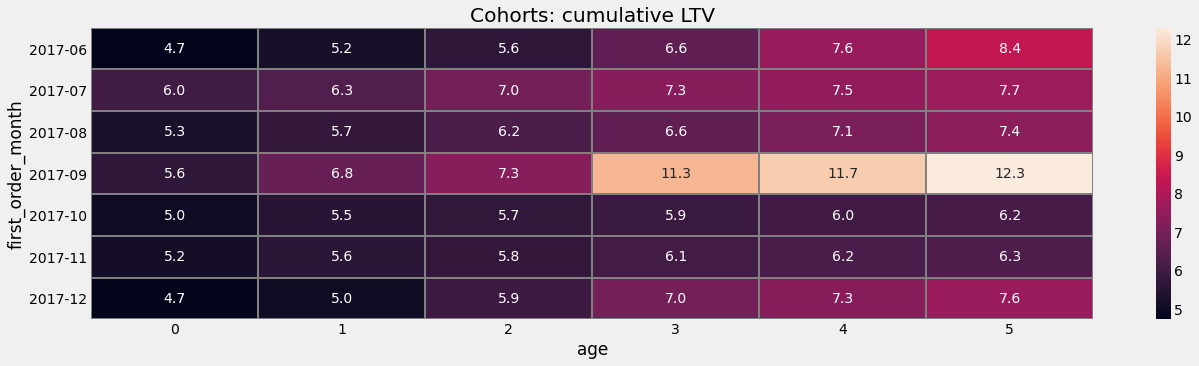

In [52]:
ltv_table = ltv_table.cumsum(axis=1).copy()
ltv_table.index = ltv_table.index.strftime('%Y-%m')
plt.figure(figsize=(20, 5))
plt.title('Cohorts: cumulative LTV')
sns.heatmap(ltv_table, annot=True, fmt='.1f', linewidths=1, linecolor='gray')
plt.show()

In [53]:
print('Cредний LTV за 6 месяцев - {:.2f}'.format(ltv_table[5].mean()))

Cредний LTV за 6 месяцев - 7.97


Подготовим датасет для анализа когорт в разрезе устройств

In [54]:
# Сгруппируем девайсы в таблице с визитами по пользователям применив аггрегирующую функцию first
first_device = visits.groupby('uid').agg({'device':'first'}).reset_index()
# Добавим в таблицу с заказами источники по ключу - номеру клиента
orders_device = orders.merge(first_device, how='left', on='uid')
orders_device.head()

,buy_ts,revenue,uid,first_ts,purchase_duration_sec,order_month,device
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,60,2017-06-01,desktop
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,660,2017-06-01,desktop
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,120,2017-06-01,desktop
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,900,2017-06-01,desktop
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,1620,2017-06-01,desktop


In [55]:
# Определим месяц первого заказа кажого пользователя и источник из которого он посетил сервис
first_device_ = orders_device.groupby('uid').agg({'order_month': 'min', 'device': 'first'}).reset_index()
first_device_.columns = ['uid', 'first_order_month', 'device']
first_device_.head()

,uid,first_order_month,device
0,313578113262317,2018-01-01,desktop
1,1575281904278712,2017-06-01,touch
2,2429014661409475,2017-10-01,desktop
3,2464366381792757,2018-01-01,desktop
4,2551852515556206,2017-11-01,desktop


In [56]:
# Сгруппируем месяц первого заказа и источники по количеству уникальных пользователей
cohort_sizes_d = first_device_.groupby(['first_order_month', 'device']).agg({'uid': 'nunique'}).reset_index()
cohort_sizes_d.columns = ['first_order_month', 'device', 'n_buyers']
cohort_sizes_d.head()

,first_order_month,device,n_buyers
0,2017-06-01,desktop,1676
1,2017-06-01,touch,347
2,2017-07-01,desktop,1508
3,2017-07-01,touch,415
4,2017-08-01,desktop,1113


In [57]:
# Добавим в таблицу с заказами информацию в каком месяце пользователь сделал свой первый заказ и из какого источника он посетил сервис
orders_new_d = pd.merge(orders_device,first_device_, on=['uid', 'device'])
orders_new_d.head()

,buy_ts,revenue,uid,first_ts,purchase_duration_sec,order_month,device,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,60,2017-06-01,desktop,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,660,2017-06-01,desktop,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,120,2017-06-01,desktop,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,900,2017-06-01,desktop,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,1620,2017-06-01,desktop,2017-06-01


In [58]:
# Сгруппируем таблицу заказов по месяцу первой покупки, месяцу каждого заказа, источнику и сложим выручку.
cohorts_d = orders_new_d.groupby(
    ['first_order_month','order_month', 'device']
).agg({'revenue':'sum', 'uid':'nunique', 'buy_ts': 'count'}).reset_index()
cohorts_d.head()

,first_order_month,order_month,device,revenue,uid,buy_ts
0,2017-06-01,2017-06-01,desktop,8172.04,1676,1960
1,2017-06-01,2017-06-01,touch,1385.45,347,394
2,2017-06-01,2017-07-01,desktop,852.30,49,162
3,2017-06-01,2017-07-01,touch,129.52,12,15
4,2017-06-01,2017-08-01,desktop,835.84,43,167


In [59]:
# Получим предготовую таблицу для когортного анализа в разбивке по источникам
# Объеденим таблицу с когортами и соответствующие им выручки и количество заказов
report_d = pd.merge(cohort_sizes_d, cohorts_d, on=['first_order_month', 'device'])
report_d = report_d.rename(columns = {'buy_ts':'revenue_count'})
report_d.head()

,first_order_month,device,n_buyers,order_month,revenue,uid,revenue_count
0,2017-06-01,desktop,1676,2017-06-01,8172.04,1676,1960
1,2017-06-01,desktop,1676,2017-07-01,852.30,49,162
2,2017-06-01,desktop,1676,2017-08-01,835.84,43,167
3,2017-06-01,desktop,1676,2017-09-01,1905.09,52,221
4,2017-06-01,desktop,1676,2017-10-01,1941.71,77,273


In [60]:
# Рассчитаем необходимые метрики
margin_rate = 1
# Валовая прибыль = выручка * маржинальность (мне как экономисту это известно как маржинальный доход)
report_d['gp'] = report_d['revenue'] * margin_rate
# Возраст кагорты = разница между месяцем заказа и первым месяцем заказа кагорты в целых месяцах
report_d['age'] = (report_d['order_month'] - report_d['first_order_month']) / np.timedelta64(1, 'M')
report_d['age'] = report_d['age'].round().astype('int')
# LTV = Валовая прибыль когорты в разбивке по источнику / количество пользователей в нулевом месяце этой когорты этого источника
report_d['ltv'] = report_d['gp'] / report_d['n_buyers']
report_d.head(3)

,first_order_month,device,n_buyers,order_month,revenue,uid,revenue_count,gp,age,ltv
0,2017-06-01,desktop,1676,2017-06-01,8172.04,1676,1960,8172.04,0,4.88
1,2017-06-01,desktop,1676,2017-07-01,852.30,49,162,852.30,1,0.51
2,2017-06-01,desktop,1676,2017-08-01,835.84,43,167,835.84,2,0.50


Выведем матрицу Ценности клиентов пришедших в сервис с разных устройств

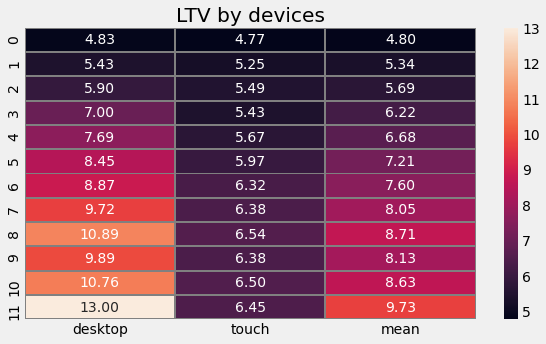

In [61]:
# Создадим закоготвку словаря, где ключем будет тип устройства, а значениями на какой срок жизни окупается средняя когорта
dev = {}
# В цикле пробежимся по всем устройствам и для каждого сформируем свою таблицу с когортами
for i in report_d['device'].unique():
    ltv = report_d.query('device == @i').pivot_table(
        index='first_order_month', 
        columns='age',
        values='ltv', 
        aggfunc='mean')
    # Добавим к устройству среднюю окупаемость по сроками
    dev[i] = ltv.cumsum(axis=1).mean(axis=0).to_dict()
# Сформируем из полученного словаря удобный датафрейм
ltv_report_ = pd.DataFrame(dev)
# Усредним окупаемость когорт по срокам и устройствам
ltv_report_['mean'] = ltv_report_.mean(axis=1)
ltv_report_
plt.figure(figsize=(9, 5))
plt.title('LTV by devices')
sns.heatmap(ltv_report_, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.show()

Выведем численость когорт в разрезе устройств

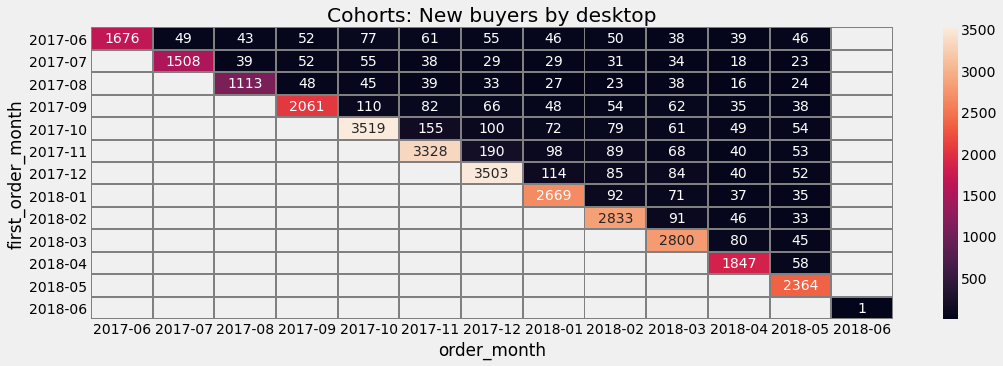

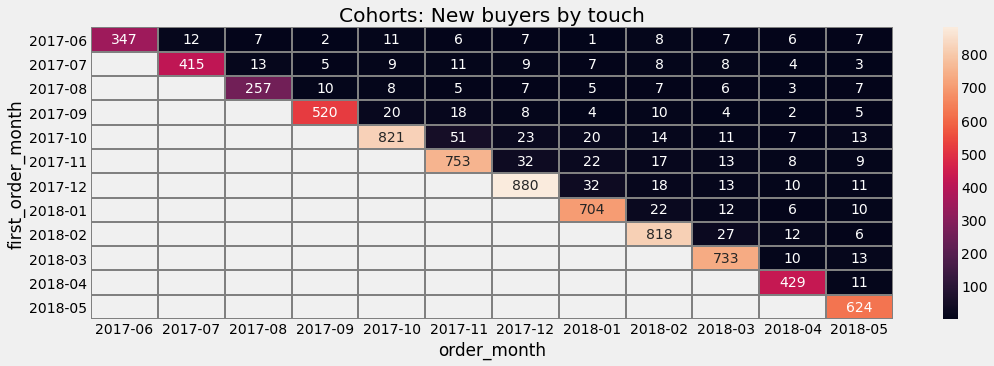

In [62]:
for i in orders_new_d['device'].unique():
    buyers_devices = orders_new_d.query('device == @i').pivot_table(
        index='first_order_month', 
        columns='order_month', 
        values='uid', 
        aggfunc='nunique')
    buyers_devices.index = buyers_devices.index.strftime('%Y-%m')
    buyers_devices.columns = buyers_devices.columns.strftime('%Y-%m')
    plt.title(f'Cohorts: New buyers by {i}')
    sns.heatmap(buyers_devices, annot=True, fmt='.0f', linewidths=1, linecolor='gray')
    plt.show()

**Вывод**  
Очевидно LTV в течении первых 6 месяцев плавно растет с 5уе до 8уе. Пользователь **5539673724080479777** безусловно внес коррективы, так что лучше использовать более чувствительный к выбросам показатель - медиану. В разрезе устройств ценность клиента до трех месяцев совпадает, а дальше десктопы уходят вперед. Но это скорее психологический момент

In [63]:
print('Медианный LTV за 6 месяцев - {:.2f}'.format(ltv_table[5].median()))

Медианный LTV за 6 месяцев - 7.64


## 4. Маркетинговые метрики  
[к оглавлению](#step_0)
<a class="anchor" id="step_4"></a>

### 4.1. Рассчет общей суммы расходов на маркетинг. Как траты распределены по источникам и как меняется это распределение во времени  
[к оглавлению](#step_0)
<a class="anchor" id="step_4.1"></a>

In [64]:
costs['month'] = costs['dt'].astype('datetime64[M]')

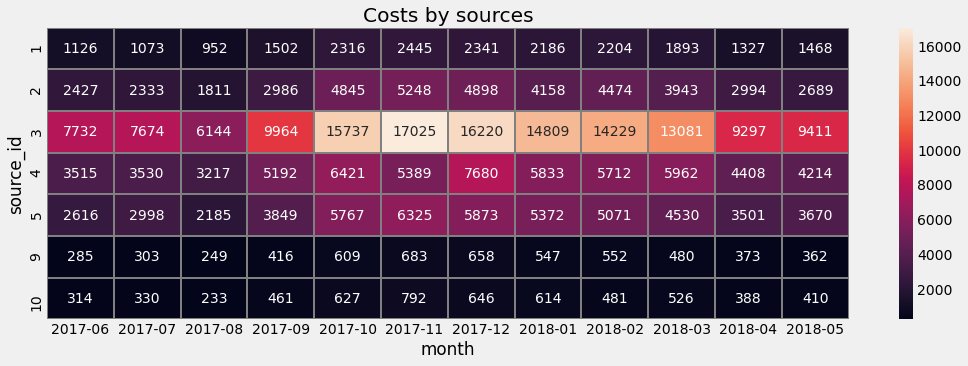

In [65]:
costs_table = costs.pivot_table(
    index='source_id', 
    columns='month', 
    values='costs', 
    aggfunc='sum')
# costs_table.index = costs_table.index.strftime('%Y-%m')
costs_table.columns = costs_table.columns.strftime('%Y-%m')
plt.title('Costs by sources')
sns.heatmap(costs_table, annot=True, fmt='.0f', linewidths=1, linecolor='gray')
plt.show()

Отобразим ту же информацию на линейном графике

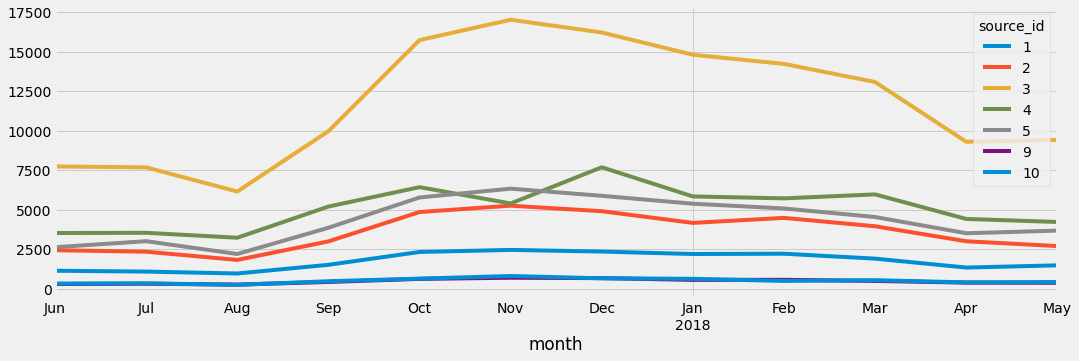

In [66]:
costs.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum').plot()
plt.show()

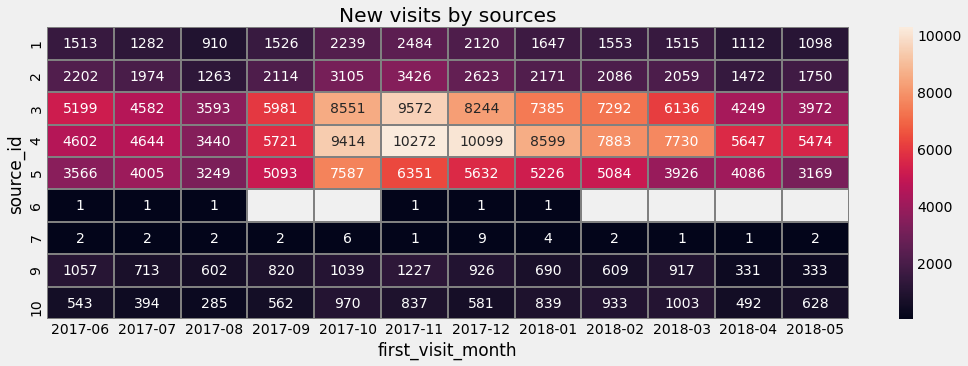

In [67]:
visits_table = visits.pivot_table(
    index='source_id', 
    columns='first_visit_month', 
    values='uid', 
    aggfunc='nunique')
# costs_table.index = costs_table.index.strftime('%Y-%m')
visits_table.columns = visits_table.columns.strftime('%Y-%m')
plt.title('New visits by sources')
sns.heatmap(visits_table, annot=True, fmt='.0f', linewidths=1, linecolor='gray')
plt.show()

Бросается в глаза, что самый затратный источник №3 не самый результативный. Дополним выводы диаграммами рассеивания (как связан рост маркетинговых расходов и приток покупателей), а так же процентами конверсии продаж каждого источника

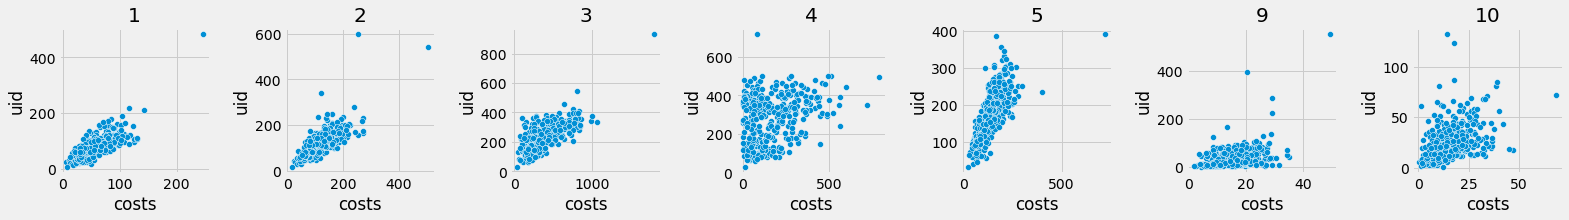

In [68]:
costs_by_day = costs.groupby(['source_id','dt']).agg({'costs':'sum'}).reset_index()
visits_by_day = visits.groupby(['source_id','session_date']).agg({'uid':'nunique'}).reset_index()
visits_by_day['session_date'] = visits_by_day['session_date'].astype('datetime64')
viscost = pd.merge(visits_by_day, costs_by_day, left_on=['session_date', 'source_id'], right_on=['dt', 'source_id'])
viscost.drop('session_date', axis='columns', inplace=True)
source_list = viscost['source_id'].unique()
fig, axs = plt.subplots(1, len(source_list), figsize=(24, 2.5))
for i, key in enumerate(source_list):
    sns.scatterplot(data=viscost.query('source_id == @key'), x='costs', y='uid', ax = axs[i]).set(title=key)
    plt.subplots_adjust(wspace=0.5, hspace=0.9)
plt.show()

In [69]:
# Сгруппируем источники в таблице с визитами по пользователям применив аггрегирующую функцию first
first_surce = visits.groupby('uid').agg({'source_id':'first'}).reset_index()
# Добавим в таблицу с заказами источники по ключу - номеру клиента
orders_sources = orders.merge(first_surce, how='left', on='uid')
orders_sources.head()

,buy_ts,revenue,uid,first_ts,purchase_duration_sec,order_month,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,60,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,660,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,120,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,900,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,1620,2017-06-01,3


Рассчитаем конверсию продаж или какая часть посетителей стала покупателями

In [70]:
con = pd.merge(
    visits.groupby('source_id').agg({'uid':'nunique'}).reset_index(),
    orders_sources.groupby('source_id').agg({'uid':'nunique'}).reset_index(), on='source_id', suffixes=('_visits', '_orders'))

In [71]:
con['%'] = con['uid_orders'] / con['uid_visits'] * 100
con

,source_id,uid_visits,uid_orders,%
0,1,18999,3743,19.70
1,2,26245,4323,16.47
2,3,74756,9138,12.22
3,4,83525,9823,11.76
4,5,56974,6839,12.00
5,7,34,1,2.94
6,9,9264,1415,15.27
7,10,8067,1241,15.38


**Вывод**  
<a class="anchor" id="step_9"></a>
* 1 источник не особо популярен в компании, но хорош. Высокая конверсия + предсказуемость поведения. Стоит развивать
* 2 источник так с похожими харктеристиками. Стоит развивать
* 3 источник нагоняет мого посетителей, но судя по рассеиванию приток пользователей меньше зависит от роста затрат как в 1 и 2. Однозначно нужно начинать преговоры о сокращении тарифов с поставщиком
* 4 источник генерит еще большее количество визитов, но с самой низкой конверсией, более того пользователи приходят и сами по себе без дополнительных расходов. Надо сократить расходы и посмотреть что будет
* 9 источник ведет себя странно, с ростом расходов пользователи не особо увеличиваются, наверно какой-то ограниченный источник. Оставим пока как есть и запрсим дополнительные данные для изучения
* 10 источник малорезультативен

### 4.2. Рассчет CAC. Сколько стоит привлечение одного покупателя из каждого источника трафика  
[к оглавлению](#step_0)
<a class="anchor" id="step_4.2"></a>

Освежим в памяти составы когорт по клиентам, после чего сформирем отчет во сколько обходится каждый платящий клиент в кажой когорте в зависимости от источника

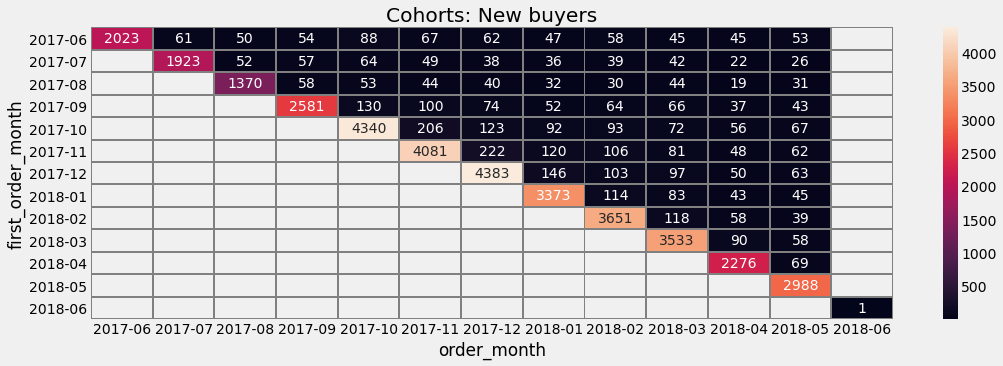

In [72]:
buyers_table = orders_new.pivot_table(
    index='first_order_month', 
    columns='order_month', 
    values='uid', 
    aggfunc='nunique')
buyers_table.index = buyers_table.index.strftime('%Y-%m')
buyers_table.columns = buyers_table.columns.strftime('%Y-%m')
plt.title('Cohorts: New buyers')
sns.heatmap(buyers_table, annot=True, fmt='.0f', linewidths=1, linecolor='gray')
plt.show()

In [73]:
# Определим месяц первого заказа кажого пользователя и источник из которого он посетил сервис
first_orders_s = orders_sources.groupby('uid').agg({'order_month': 'min', 'source_id': 'first'}).reset_index()
first_orders_s.columns = ['uid', 'first_order_month', 'source_id']
first_orders_s.head()

,uid,first_order_month,source_id
0,313578113262317,2018-01-01,2
1,1575281904278712,2017-06-01,10
2,2429014661409475,2017-10-01,3
3,2464366381792757,2018-01-01,5
4,2551852515556206,2017-11-01,5


In [74]:
# Сгруппируем месяц первого заказа и источники по количеству уникальных пользователей
cohort_sizes_s = first_orders_s.groupby(['first_order_month', 'source_id']).agg({'uid': 'nunique'}).reset_index()
cohort_sizes_s.columns = ['first_order_month', 'source_id', 'n_buyers']
cohort_sizes_s.head()

,first_order_month,source_id,n_buyers
0,2017-06-01,1,203
1,2017-06-01,2,271
2,2017-06-01,3,574
3,2017-06-01,4,417
4,2017-06-01,5,368


In [75]:
# Добавим в таблицу с заказами информацию в каком месяце пользователь сделал свой первый заказ и из какого источника он посетил сервис
orders_new_s = pd.merge(orders_sources,first_orders_s, on=['uid', 'source_id'])
orders_new_s.head()

,buy_ts,revenue,uid,first_ts,purchase_duration_sec,order_month,source_id,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,60,2017-06-01,1,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,660,2017-06-01,2,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,120,2017-06-01,2,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,900,2017-06-01,2,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,1620,2017-06-01,3,2017-06-01


In [76]:
# Сгруппируем таблицу заказов по месяцу первой покупки, месяцу каждого заказа, источнику и сложим выручку.
cohorts_s = orders_new_s.groupby(
    ['first_order_month','order_month', 'source_id']
).agg({'revenue':'sum', 'uid':'nunique', 'buy_ts': 'count'}).reset_index()
cohorts_s.head()

,first_order_month,order_month,source_id,revenue,uid,buy_ts
0,2017-06-01,2017-06-01,1,1168.45,203,267
1,2017-06-01,2017-06-01,2,1551.76,271,347
2,2017-06-01,2017-06-01,3,2466.71,574,621
3,2017-06-01,2017-06-01,4,2039.64,417,470
4,2017-06-01,2017-06-01,5,1787.68,368,432


In [77]:
# Получим предготовую таблицу для когортного анализа в разбивке по источникам
# Объеденим таблицу с когортами и соответствующие им выручки и количество заказов
report_s = pd.merge(cohort_sizes_s, cohorts_s, on=['first_order_month', 'source_id'])
report_s = report_s.rename(columns = {'buy_ts':'revenue_count'})
report_s.head()

,first_order_month,source_id,n_buyers,order_month,revenue,uid,revenue_count
0,2017-06-01,1,203,2017-06-01,1168.45,203,267
1,2017-06-01,1,203,2017-07-01,362.94,11,62
2,2017-06-01,1,203,2017-08-01,153.72,10,41
3,2017-06-01,1,203,2017-09-01,695.88,13,103
4,2017-06-01,1,203,2017-10-01,760.74,14,116


In [78]:
# Рассчитаем необходимые метрики
margin_rate = 1
# Валовая прибыль = выручка * маржинальность (мне как экономисту это известно как маржинальный доход)
report_s['gp'] = report_s['revenue'] * margin_rate
# Возраст кагорты = разница между месяцем заказа и первым месяцем заказа кагорты в целых месяцах
report_s['age'] = (report_s['order_month'] - report_s['first_order_month']) / np.timedelta64(1, 'M')
report_s['age'] = report_s['age'].round().astype('int')
# LTV = Валовая прибыль когорты в разбивке по источнику / количество пользователей в нулевом месяце этой когорты этого источника
report_s['ltv'] = report_s['gp'] / report_s['n_buyers']
report_s.head(3)

,first_order_month,source_id,n_buyers,order_month,revenue,uid,revenue_count,gp,age,ltv
0,2017-06-01,1,203,2017-06-01,1168.45,203,267,1168.45,0,5.76
1,2017-06-01,1,203,2017-07-01,362.94,11,62,362.94,1,1.79
2,2017-06-01,1,203,2017-08-01,153.72,10,41,153.72,2,0.76


In [79]:
# Сгрупприруем пользователей по месяцу первой покупки и источнику
orders_by_source = orders_new_s.groupby(['first_order_month', 'source_id']).agg({'uid':'nunique'}).reset_index()

In [80]:
# Сгрупприруем расходы по месяцу и источнику
costs_by_source = costs.groupby(['month', 'source_id']).agg({'costs':'sum'}).reset_index()

In [81]:
# Свяжем оплаты заказов с затратами в зависимости от источника и месяца их совершения
orders_costs_s = pd.merge(orders_by_source, costs_by_source, how='left', left_on=['first_order_month', 'source_id'], right_on=['month', 'source_id'])
orders_costs_s.head()

,first_order_month,source_id,uid,month,costs
0,2017-06-01,1,203,2017-06-01,1125.61
1,2017-06-01,2,271,2017-06-01,2427.38
2,2017-06-01,3,574,2017-06-01,7731.65
3,2017-06-01,4,417,2017-06-01,3514.80
4,2017-06-01,5,368,2017-06-01,2616.12


In [82]:
# Проделаем то же самое но без источников. Это понадобится при расчете общих LTV и ROMI
orders_costs = orders_costs_s.groupby('first_order_month').agg({'uid':'sum', 'costs':'sum'}).reset_index()
orders_costs.head()

,first_order_month,uid,costs
0,2017-06-01,2023,18015.00
1,2017-07-01,1923,18240.59
2,2017-08-01,1370,14790.54
3,2017-09-01,2581,24368.91
4,2017-10-01,4340,36322.88


In [83]:
# Рассчитаем CAC и ROMI без разбивки на источники
report_romi = pd.merge(report, orders_costs[['first_order_month', 'costs']], how='left', on='first_order_month')
report_romi['cac'] = report_romi['costs'] / report_romi['n_buyers']
report_romi['romi'] = (report_romi['ltv'] / report_romi['cac'])
report_romi.head()

,first_order_month,n_buyers,order_month,revenue,uid,revenue_count,gp,age,ltv,apc,arppu,costs,cac,romi
0,2017-06-01,2023,2017-06-01,9557.49,2023,2354,9557.49,0,4.72,1.16,4.72,18015.00,8.91,0.53
1,2017-06-01,2023,2017-07-01,981.82,61,177,981.82,1,0.49,0.09,16.10,18015.00,8.91,0.05
2,2017-06-01,2023,2017-08-01,885.34,50,174,885.34,2,0.44,0.09,17.71,18015.00,8.91,0.05
3,2017-06-01,2023,2017-09-01,1931.30,54,226,1931.30,3,0.95,0.11,35.76,18015.00,8.91,0.11
4,2017-06-01,2023,2017-10-01,2068.58,88,292,2068.58,4,1.02,0.14,23.51,18015.00,8.91,0.11


In [84]:
# Рассчитаем CAC и ROMI с разбивкой на источники
report_romi_s = pd.merge(report_s, orders_costs_s[['first_order_month', 'source_id','costs']], how='left', on=['first_order_month', 'source_id'])
report_romi_s['cac'] = report_romi_s['costs'] / report_romi_s['n_buyers']
report_romi_s['romi'] = (report_romi_s['ltv'] / report_romi_s['cac'])
report_romi_s.head()

,first_order_month,source_id,n_buyers,order_month,revenue,uid,revenue_count,gp,age,ltv,costs,cac,romi
0,2017-06-01,1,203,2017-06-01,1168.45,203,267,1168.45,0,5.76,1125.61,5.54,1.04
1,2017-06-01,1,203,2017-07-01,362.94,11,62,362.94,1,1.79,1125.61,5.54,0.32
2,2017-06-01,1,203,2017-08-01,153.72,10,41,153.72,2,0.76,1125.61,5.54,0.14
3,2017-06-01,1,203,2017-09-01,695.88,13,103,695.88,3,3.43,1125.61,5.54,0.62
4,2017-06-01,1,203,2017-10-01,760.74,14,116,760.74,4,3.75,1125.61,5.54,0.68


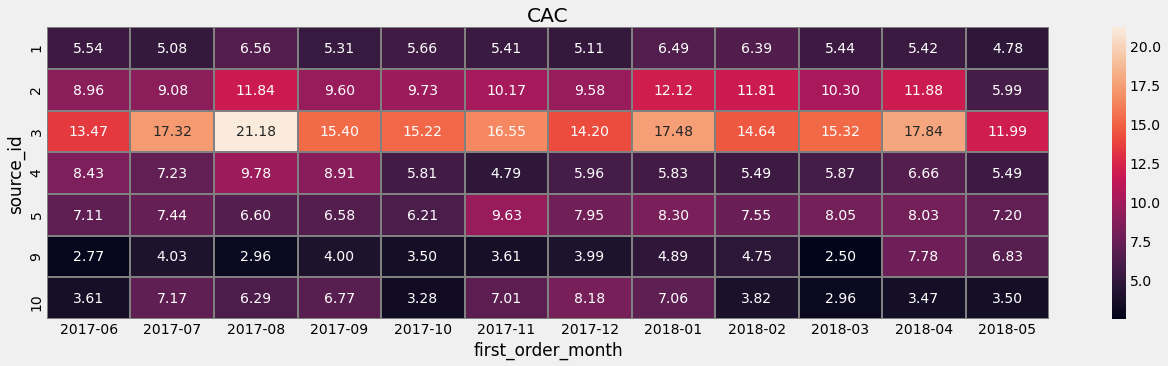

In [85]:
# Выведем в графике во сколько фирме обходится новый платящий клиент
cac_pivot = report_romi_s.pivot_table(
    index='source_id', 
    columns='first_order_month', 
    values='cac')
cac_pivot.columns = cac_pivot.columns.strftime('%Y-%m')
plt.figure(figsize=(20, 5))
plt.title('CAC')
sns.heatmap(cac_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.show()

Проверим чтобы не потерялись изначальные цифры

In [86]:
costs['costs'].sum()

329131.62

In [87]:
report_romi_s.groupby(['first_order_month', 'source_id']).agg({'costs':'mean'}).reset_index()['costs'].sum()

329131.62

In [88]:
orders['revenue'].sum()

252057.19999999998

In [89]:
report_romi_s['revenue'].sum()

252057.2

Все данные на месте

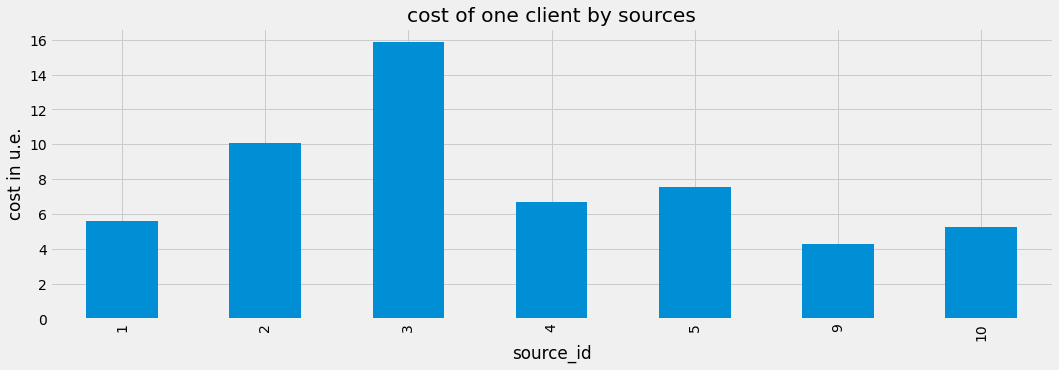

In [90]:
cac_pivot['mean_cac'] = cac_pivot.mean(axis=1)
cac_pivot['mean_cac'].plot(kind='bar')
plt.title('cost of one client by sources')
plt.ylabel('cost in u.e.')
plt.show()

Выведем во сколько обходится клиент из когорт если усреднить их по источникам

In [91]:
cac_cohorts = report_romi.pivot_table(
    columns='first_order_month', 
    values='cac')
cac_cohorts.columns = cac_cohorts.columns.strftime('%Y-%m')
cac_cohorts['mean_cac'] = cac_cohorts.mean(axis=1)
cac_cohorts

first_order_month,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,mean_cac
cac,8.91,9.49,10.80,9.44,8.37,9.29,8.74,9.94,8.96,8.61,9.79,7.44,0.00,8.44


**Вывод**  
Клиенты пришедшие из источника №3 обходятся фирме дороже всего. Подкрепляя этим выводом предыдущие, однозначно нужно сокращать расходы путем переговоров и сэкономленные средства пускать на развитие источников 1 и 2. Стоимость одного усредененного клиента когорты колеблется окого 8.44уе

### 4.3. Рассчет ROMI по когортам в разрезе источников.  
[к оглавлению](#step_0)
<a class="anchor" id="step_4.3"></a>

Преже чем выводить ROMI по когортам и источникам, сформируем общие метрики LTV и ROMI по когортам, чтобы удостовериться что все рассчеты верны.

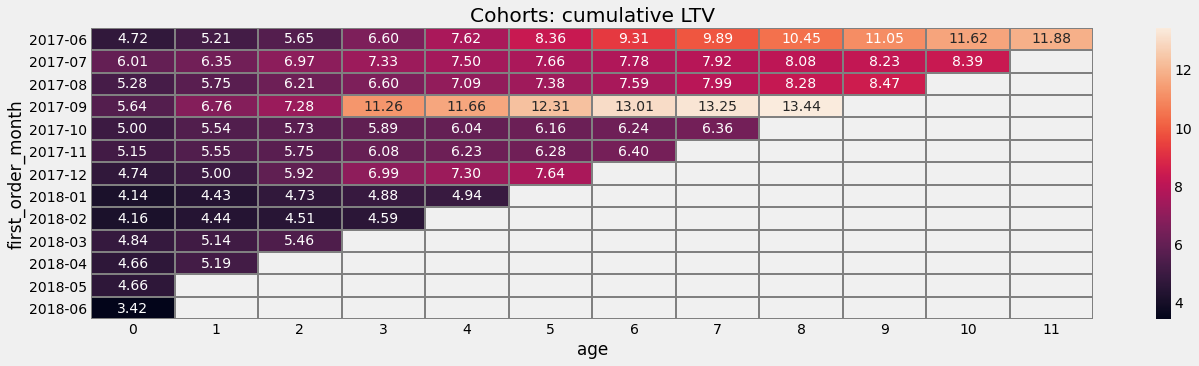

In [92]:
ltv_table = report.pivot_table(
        index='first_order_month', 
        columns='age',
        values='ltv', 
        aggfunc='mean')
ltv_table = ltv_table.cumsum(axis=1).copy()
ltv_table.index = ltv_table.index.strftime('%Y-%m')
plt.figure(figsize=(20, 5))
plt.title('Cohorts: cumulative LTV')
sns.heatmap(ltv_table, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.show()

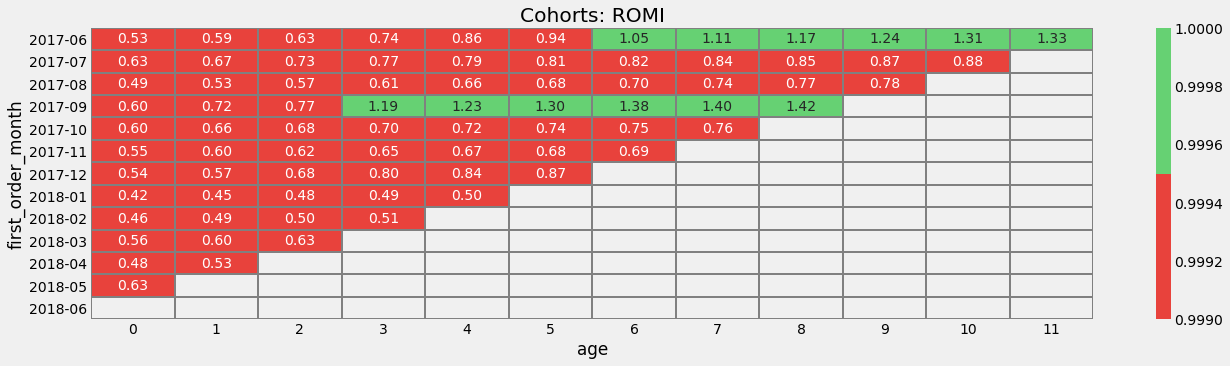

In [93]:
romi_table = report_romi.pivot_table(
        index='first_order_month', 
        columns='age',
        values='romi', 
        aggfunc='mean')
romi_table = romi_table.cumsum(axis=1).copy()
romi_table.index = romi_table.index.strftime('%Y-%m')
plt.figure(figsize=(20, 5))
plt.title('Cohorts: ROMI')
sns.heatmap(romi_table, annot=True, fmt='.2f', linewidths=1, linecolor='gray', vmin=0.999, vmax=1.0, cmap = sns.color_palette(colours))
plt.show()

Выборочно введем имя когорты и  ее возраст. Расчет должен соответсвовать табличному

In [94]:
cohort_name = '2017-06'
age = 7

In [95]:
romi = ltv_table.loc[cohort_name,age] / cac_cohorts[cohort_name]
print(f'Проверка. ROMI когорты {cohort_name} возраста {age} равен {float(romi)}')
print(f'То же самое из таблицы ROMI                     {romi_table.loc[cohort_name,age]}')

Проверка. ROMI когорты 2017-06 возраста 7 равен 1.1108381903968918
То же самое из таблицы ROMI                     1.1108381903968916


Проверка пройдена. Сформируем матрицу окупаемости каждой когорты в зависимости от источника

Очень заметно как повлиял в декабре клиент с **id 5539673724080479777** Афише не стоит в будущем рассчитывать на таких щедрых клиентов. Вцелом из когорт себя окупила лишь июньская и то на 6 месяц

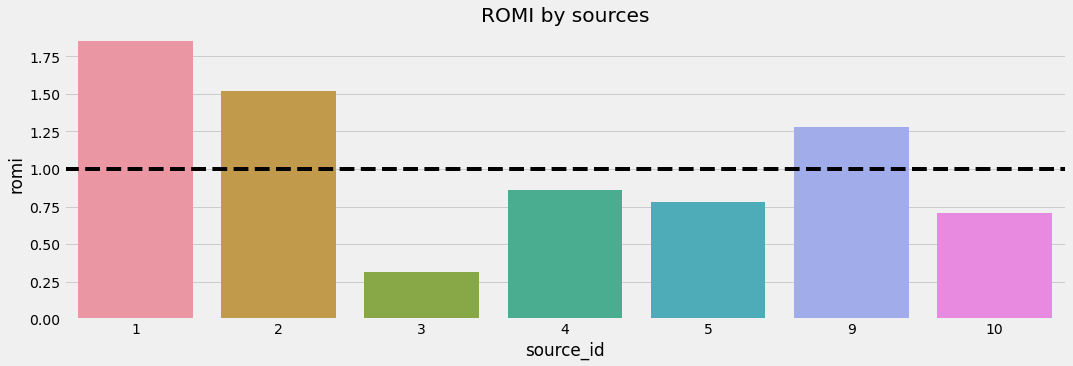

In [96]:
total_romi = report_romi_s.groupby(['first_order_month','source_id']).agg({'gp':'sum','costs':'first'}).reset_index().groupby('source_id').agg({'gp':'sum','costs':'sum'}).reset_index()
total_romi = total_romi.query('costs !=0').copy()
total_romi['romi'] = total_romi['gp'] / total_romi['costs']
sns.barplot(x = 'source_id', y = 'romi', data = total_romi)
plt.axhline(y=1, color='black', linestyle='--')
plt.title('ROMI by sources')
plt.show()

In [97]:
# # Создадим закоготвку словаря, где ключом будет номер источника, а значениями на какой срок жизни окупается средняя когорта этого источника
# sour = {}
# # В цикле пробежимся по всем источникам и для каждого сформируем свою таблицу с когортами
# for i in report_romi_s['source_id'].unique():
#     romi = report_romi_s.query('source_id == @i').pivot_table(
#         index='first_order_month', 
#         columns='order_month',
#         values='romi', 
#         aggfunc='mean')
#     # Добавим к источнику среднюю окупаемость по сроками
#     sour[i] = romi.cumsum(axis=1).mean(axis=0).to_dict()
# # Сформируем из полученного словаря удобный датафрейм
# romi_report_ = pd.DataFrame(sour)
# # Усредним окупаемость когорт по срокам и источникам
# romi_report_['mean'] = romi_report_.mean(axis=1)
# romi_report_.index = romi_report_.index.strftime('%Y-%m')
# # Отразим результаты в двуцветной карте. Красный цвет - пока не окупился, зеленый - окупился
# plt.figure(figsize=(9, 5))
# plt.title('ROMI by sources')
# sns.heatmap(romi_report_, annot=True, fmt='.2f', linewidths=1, linecolor='gray', vmin=0.999, vmax=1.0, cmap = sns.color_palette(colours))
# plt.xlabel('sources')
# plt.ylabel('age')
# plt.show()

Матрица подтверждает предыдушие выводы.  
* Источник №1 самый топовый. 
* Источник №2 резко окупился после щедрости пользователя с **id 5539673724080479777** (мы помним что это случилось на 4 месяц жизни когорты 2017-09). Но и без этого клиента когрта приближалась к окупаемости. 
* По источникам №3 и №4 надеюсь группа переговорщиков уже в пути. 
* Источники №5 и №9 решительно стоит развивать, но только после дополнительного изучения, 
* Источник №10 можно прикрыть на некоторое время, чтобы не отвлекал ресурсы

**Вывод**  
Источники 1 и 9 проявляют себя замечательно во всех аспектах вспомним выводы в разделе [4.1.](#step_9), их стоит развивать. Источник 2 неплох и по конверсии и по предсказуемости, но стоит обратить внимание на поведение когорт и попросить доп скидку у поставщика трафика. Когорты 2018 еще далеки от окупаемости, но они и молоды, ближе к осени они себя проявят. Думаю после перераспределения рекламного бюджета ситуация улучшится. Истчточник №7 достался бесплатно

## 5. Общий вывод.  
[к оглавлению](#step_0)
<a class="anchor" id="step_5"></a>  


Резюмируем предыдущие выводы. 
* Источники трафика №1 и № 9 - однозначно нужно развивать
* Источники трафика №2 - уделить внимание у него хорошая конверсия и предсказуемость, 
* Источники трафика №3, №4 и №5 - тебовать скидки или сокращать
* Активность на десктопах пропроционально выше чем на мобильных устройствах как по частоте сессий так и по длительности. К тому же  на следующий месяц клиенты пришедшие с телефонов перестают покупать
* Ранние когорты окупаются быстрее. Когорта 2017-06 самая активная в плане покупок
* Щедрых клиентов нужно выделять и поощрять
